# WeatherPy

In [2]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sns
import csv
import urllib

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File(CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [25]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

#Indentify nearest city for each lat,lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

606

## Perform API Calls

In [96]:
# OpenWeather API Key
api_key = "96b392d27de5ad004a079b28fe040981"

# Starting URL for Weather MAP API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#List of City data
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counter
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes:
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Group cities in sets of 50 for logging purposes:
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    
    #Add 1 to the record count
    record_count += 1
    
    #Run on API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | molina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=molina
Processing Record 2 of Set 1 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=batagay-alyta
Processing Record 3 of Set 1 | karasjok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=karasjok
Processing Record 4 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=port%20alfred
Processing Record 5 of Set 1 | port shepstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=port%20shepstone
Processing Record 6 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=mataura
Pr

Processing Record 3 of Set 2 | dong xoai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=dong%20xoai
Processing Record 4 of Set 2 | laplace
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=laplace
Processing Record 5 of Set 2 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=avarua
Processing Record 6 of Set 2 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=saint%20george
Processing Record 7 of Set 2 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kavaratti
Processing Record 8 of Set 2 | nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=nabire
Processing Record 9 of Set 2 | katsuura
http://api.openweathermap.org/data/2.5/wea

Processing Record 7 of Set 3 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=chuy
Processing Record 8 of Set 3 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kodiak
Processing Record 9 of Set 3 | harer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=harer
Processing Record 10 of Set 3 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=nishihara
Processing Record 11 of Set 3 | morant bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=morant%20bay
Processing Record 12 of Set 3 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=samarai
Processing Record 13 of Set 3 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 11 of Set 4 | edgemoor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=edgemoor
Processing Record 12 of Set 4 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=belyy%20yar
Processing Record 13 of Set 4 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kahului
Processing Record 14 of Set 4 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=antofagasta
Processing Record 15 of Set 4 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=bengkulu
Processing Record 16 of Set 4 | kihei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kihei
Processing Record 17 of Set 4 | grindavik
http://api.openweathermap.org/data/2.5

Processing Record 15 of Set 5 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kavieng
Processing Record 16 of Set 5 | santa rosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=santa%20rosa
Processing Record 17 of Set 5 | slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=slave%20lake
Processing Record 18 of Set 5 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kamenskoye
Processing Record 19 of Set 5 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=komsomolskiy
Processing Record 20 of Set 5 | zhmerynka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=zhmerynka
Processing Record 21 of Set 5 | ambulu
http://api.openweat

Processing Record 19 of Set 6 | tepalcatepec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=tepalcatepec
Processing Record 20 of Set 6 | vuktyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=vuktyl
Processing Record 21 of Set 6 | zolotinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=zolotinka
Processing Record 22 of Set 6 | uaua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=uaua
Processing Record 23 of Set 6 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=palabuhanratu
Processing Record 24 of Set 6 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=amderma
Processing Record 25 of Set 6 | bend
http://api.openweathermap.org/data/2.5/

Processing Record 23 of Set 7 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=samusu
Processing Record 24 of Set 7 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=krasnoselkup
Processing Record 25 of Set 7 | novobirilyussy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=novobirilyussy
Processing Record 26 of Set 7 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=husavik
Processing Record 27 of Set 7 | maanshan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=maanshan
Processing Record 28 of Set 7 | masindi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=masindi
Processing Record 29 of Set 7 | matiri
http://api.openweathermap.org/d

Processing Record 27 of Set 8 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=fort%20nelson
Processing Record 28 of Set 8 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=ucluelet
Processing Record 29 of Set 8 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=nanortalik
Processing Record 30 of Set 8 | marion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=marion
Processing Record 31 of Set 8 | birecik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=birecik
Processing Record 32 of Set 8 | mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=mnogovershinnyy
Processing Record 33 of Set 8 | carlos chagas
http://api.openw

Processing Record 31 of Set 9 | panorama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=panorama
Processing Record 32 of Set 9 | muisne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=muisne
Processing Record 33 of Set 9 | kashary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kashary
Processing Record 34 of Set 9 | katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=katangli
Processing Record 35 of Set 9 | nyuksenitsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=nyuksenitsa
Processing Record 36 of Set 9 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=camana
Processing Record 37 of Set 9 | ketchikan
http://api.openweathermap.org/data/2.5/weath

Processing Record 34 of Set 10 | jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=jumla
Processing Record 35 of Set 10 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=rio%20grande
Processing Record 36 of Set 10 | pakxan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=pakxan
Processing Record 37 of Set 10 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=coihaique
Processing Record 38 of Set 10 | albanel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=albanel
Processing Record 39 of Set 10 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=hambantota
Processing Record 40 of Set 10 | buraydah
http://api.openweathermap.org/data

Processing Record 38 of Set 11 | palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=palana
Processing Record 39 of Set 11 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=palmer
Processing Record 40 of Set 11 | kundla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=kundla
Processing Record 41 of Set 11 | colwyn bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=colwyn%20bay
Processing Record 42 of Set 11 | ballitoville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=ballitoville
Processing Record 43 of Set 11 | singleton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=singleton
Processing Record 44 of Set 11 | kapit
http://api.openweathermap.org/dat

Processing Record 42 of Set 12 | jimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=jimo
Processing Record 43 of Set 12 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=ambon
Processing Record 44 of Set 12 | brcko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=brcko
Processing Record 45 of Set 12 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=alice%20springs
Processing Record 46 of Set 12 | geresk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=geresk
Processing Record 47 of Set 12 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96b392d27de5ad004a079b28fe040981&q=bathsheba
Processing Record 48 of Set 12 | umea
http://api.openweathermap.org/data/2.5/weather?u

In [97]:
# Convert array of JSONs into Pandas Dataframe
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the dataframe
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

#Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

#Show Record Count
city_data_pd.count()

City          604
Cloudiness    604
Country       604
Date          604
Humidity      604
Lat           604
Lng           604
Max Temp      604
Wind Speed    604
dtype: int64

In [98]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,molina,75,CL,1508857200,72,-35.12,-71.28,60.80,9.17
1,batagay-alyta,56,RU,1508862231,60,67.80,130.41,-8.93,2.17
2,karasjok,20,NO,1508860200,79,69.47,25.51,28.40,24.16
3,port alfred,0,ZA,1508862232,77,-33.59,26.89,67.62,7.43
4,port shepstone,80,ZA,1508862025,97,-30.74,30.45,68.21,5.64


## Latitude vs. Max Temperature Plot

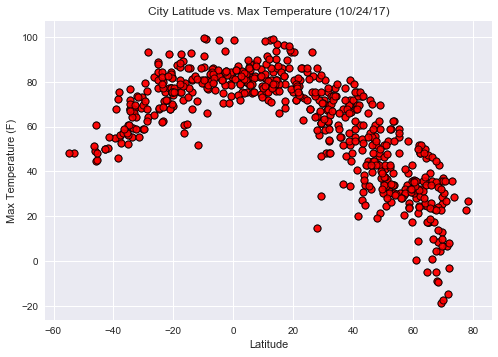

In [101]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            color="red",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
#plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

## Latitude vs. Humidity Plot

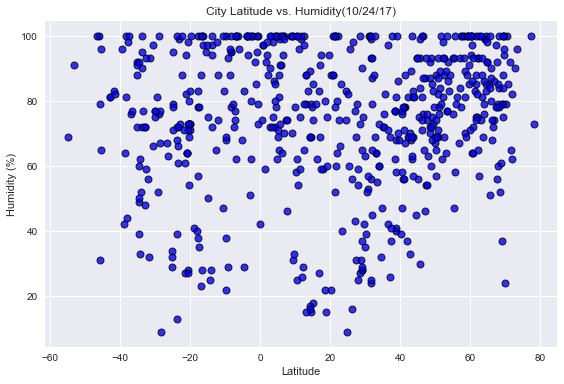

In [102]:
# Build the scatter plots for latitude vs. humidity plot
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Plot
#plt.savefig("fig1.png")

# Show Plot
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

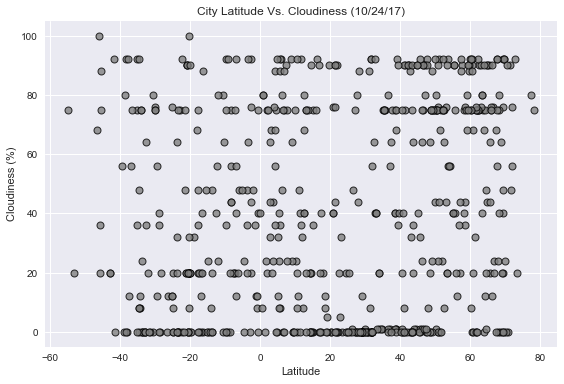

In [105]:
#Build the scatter plots for latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness,
            color="grey", 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Plot
#plt.savefig("fig2.png")

#Show Plot
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

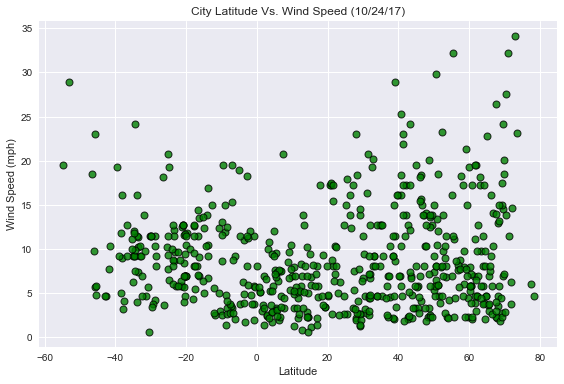

In [104]:
#Build the scatter plots for latitude vs. wind speed plot
plt.scatter(lats,
            wind_speed,
            color="green",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

#Format Plot
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save
#plt.savefig("fig4.png")

#Show Plot
plt.tight_layout()
plt.show()